In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [2]:
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [4]:
train.shape

(103904, 25)

In [5]:
test.shape

(25976, 25)

In [6]:
#Merge 2 csv files
data = pd.concat([train,test])
data.shape

(129880, 25)

# Data Preparation

## 1. Data Cleaning 

In [7]:
#Remove unnecessary columns
data.drop(columns=['Unnamed: 0', 'id'], inplace=True)

In [8]:
#Check for duplicate values
data.duplicated().any()

False

In [9]:
#Check missing values
data.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

In [10]:
#Replace missing values with median()
data['Arrival Delay in Minutes'].fillna(data['Arrival Delay in Minutes'].median(axis = 0), inplace = True)

In [11]:
data.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [12]:
data.head(10)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,1,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,2,3,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,Female,Loyal Customer,52,Business travel,Business,2035,4,3,4,4,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,Female,Loyal Customer,41,Business travel,Business,853,1,2,2,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,3,4,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


## 2. Data Transformation

In [13]:
#Label encoding for categorical variables
label_encoder = preprocessing.LabelEncoder()
cat_cols = ['satisfaction', 'Gender', 'Customer Type', 'Type of Travel', 'Class']
for cols in data[cat_cols]:
    data[cols] = label_encoder.fit_transform(data[cols])

In [14]:
#Using the get_dummies method for other variables
data = pd.get_dummies(data)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  int32  
 1   Customer Type                      129880 non-null  int32  
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  int32  
 4   Class                              129880 non-null  int32  
 5   Flight Distance                    129880 non-null  int64  
 6   Inflight wifi service              129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Ease of Online booking             129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Online boarding                    12988

In [16]:
# Outliers Detection and Removal
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data.shape

(76442, 23)

In [17]:
X = data.drop('satisfaction', axis=1)
y = data['satisfaction']

scale = StandardScaler()
X = scale.fit_transform(X)

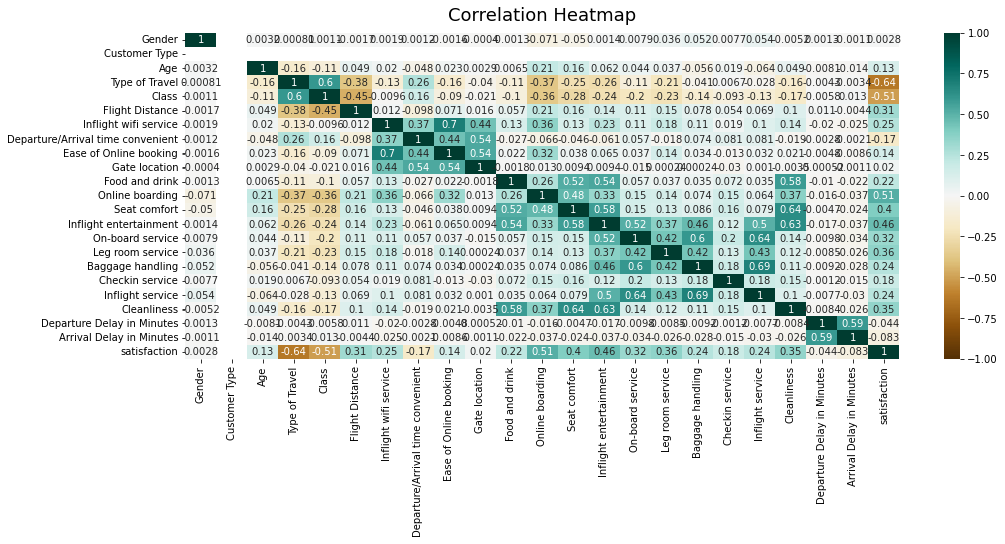

In [18]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data.corr(),
                      vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap',
                  fontdict={'fontsize':18}, pad=12);

In [19]:
data.drop(['Gender','Gate location'], axis=1, inplace=True)

# Model Building

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76442 entries, 0 to 25974
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer Type                      76442 non-null  int32  
 1   Age                                76442 non-null  int64  
 2   Type of Travel                     76442 non-null  int32  
 3   Class                              76442 non-null  int32  
 4   Flight Distance                    76442 non-null  int64  
 5   Inflight wifi service              76442 non-null  int64  
 6   Departure/Arrival time convenient  76442 non-null  int64  
 7   Ease of Online booking             76442 non-null  int64  
 8   Food and drink                     76442 non-null  int64  
 9   Online boarding                    76442 non-null  int64  
 10  Seat comfort                       76442 non-null  int64  
 11  Inflight entertainment             76442 non-null  int

In [21]:
#Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
X_train.shape

(61153, 22)

In [23]:
X_test.shape

(15289, 22)

### Decision Tree Classifier

In [24]:
#Create the model
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
#Train the model
dt.fit(X_train, y_train)
#Make prediction
dt_pred = dt.predict(X_test)

In [25]:
print("Accuracy Score:",accuracy_score(y_test, dt_pred))
print("AUC Score",roc_auc_score(y_test, dt_pred))
print("classification Report:\n",classification_report(y_test, dt_pred))
print("confusion Matrix:\n",confusion_matrix(y_test, dt_pred))

Accuracy Score: 0.9564392700634443
AUC Score 0.9564060888493184
classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96      7540
           1       0.96      0.96      0.96      7749

    accuracy                           0.96     15289
   macro avg       0.96      0.96      0.96     15289
weighted avg       0.96      0.96      0.96     15289

confusion Matrix:
 [[7193  347]
 [ 319 7430]]


In [26]:
#Satisfied
print("Precision Score",precision_score(y_test, dt_pred))
print("Recall Score",recall_score(y_test, dt_pred))

Precision Score 0.9553812524109554
Recall Score 0.9588333978577881


In [27]:
#Neutral or dissatisfied
print("Precision Score",precision_score(y_test, dt_pred, pos_label=0))
print("Recall Score",recall_score(y_test, dt_pred, pos_label=0))

Precision Score 0.957534611288605
Recall Score 0.9539787798408488


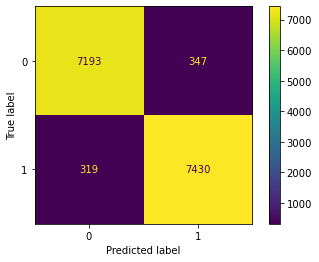

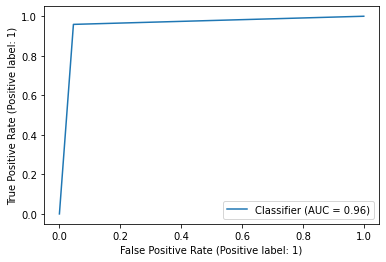

In [28]:
ConfusionMatrixDisplay.from_predictions(y_test, dt_pred)
RocCurveDisplay.from_predictions(y_test, dt_pred)

### Random Forest Classifier

In [29]:
#Create the model
rf = RandomForestClassifier(n_estimators = 1200, max_depth = 25, min_samples_leaf = 1, 
                            min_samples_split = 2, random_state = 42)
#Train the model
rf.fit(X_train, y_train)
#Make prediction
rf_pred = rf.predict(X_test)

In [30]:
print("Accuracy Score:",accuracy_score(y_test, rf_pred))
print("AUC Score",roc_auc_score(y_test, rf_pred))
print("classification Report:\n",classification_report(y_test, rf_pred))
print("confusion Matrix:\n",confusion_matrix(y_test, rf_pred))

Accuracy Score: 0.9680162208123487
AUC Score 0.9682025112849334
classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97      7540
           1       0.98      0.95      0.97      7749

    accuracy                           0.97     15289
   macro avg       0.97      0.97      0.97     15289
weighted avg       0.97      0.97      0.97     15289

confusion Matrix:
 [[7403  137]
 [ 352 7397]]


In [31]:
#Satisfied
print("Precision Score",precision_score(y_test, rf_pred))
print("Recall Score",recall_score(y_test, rf_pred))

Precision Score 0.9818157685160606
Recall Score 0.9545747838430765


In [32]:
#Neutral or dissatisfied
print("Precision Score",precision_score(y_test, rf_pred, pos_label=0))
print("Recall Score",recall_score(y_test, rf_pred, pos_label=0))

Precision Score 0.9546099290780142
Recall Score 0.9818302387267904


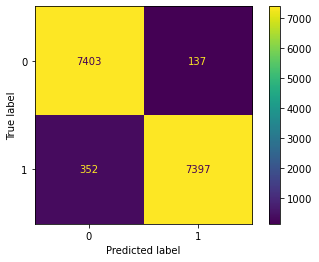

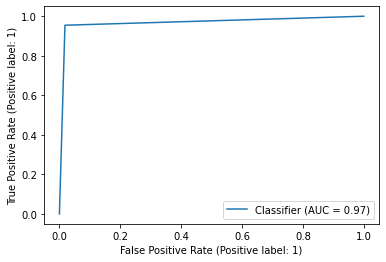

In [33]:
ConfusionMatrixDisplay.from_predictions(y_test, rf_pred)
RocCurveDisplay.from_predictions(y_test, rf_pred)

### Support Vector Classifier

In [34]:
#Create the model
svc = SVC(gamma = 'auto')
#Train the model
svc.fit(X_train, y_train)
#Make prediction
svc_pred = svc.predict(X_test)

In [35]:
print("Accuracy Score:",accuracy_score(y_test, svc_pred))
print("AUC Score",roc_auc_score(y_test, svc_pred))
print("classification Report:\n",classification_report(y_test, svc_pred))
print("confusion Matrix:\n",confusion_matrix(y_test, svc_pred))

Accuracy Score: 0.9598404081365688
AUC Score 0.9599956595751381
classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      7540
           1       0.97      0.95      0.96      7749

    accuracy                           0.96     15289
   macro avg       0.96      0.96      0.96     15289
weighted avg       0.96      0.96      0.96     15289

confusion Matrix:
 [[7324  216]
 [ 398 7351]]


In [36]:
#Satisfied
print("Precision Score",precision_score(y_test, svc_pred))
print("Recall Score",recall_score(y_test, svc_pred))

Precision Score 0.9714550019822915
Recall Score 0.9486385340043877


In [37]:
#Neutral or dissatisfied
print("Precision Score",precision_score(y_test, svc_pred, pos_label=0))
print("Recall Score",recall_score(y_test, svc_pred, pos_label=0))

Precision Score 0.9484589484589485
Recall Score 0.9713527851458886


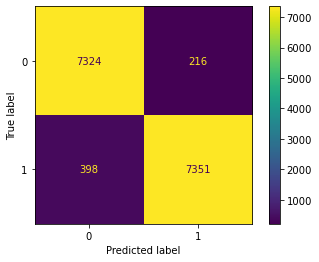

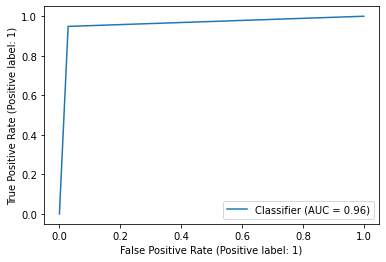

In [38]:
ConfusionMatrixDisplay.from_predictions(y_test, svc_pred)
RocCurveDisplay.from_predictions(y_test, svc_pred)

### Extreme Gradient Boosting

In [39]:
#Create the model
xgb = XGBClassifier(n_estimators = 500, max_depth = 16)
#Train the model
xgb.fit(X_train, y_train)
#Make prediction
xgb_pred = xgb.predict(X_test)

In [40]:
print("Accuracy Score:",accuracy_score(y_test, xgb_pred))
print("AUC Score",roc_auc_score(y_test, xgb_pred))
print("classification Report:\n",classification_report(y_test, xgb_pred))
print("confusion Matrix:\n",confusion_matrix(y_test, xgb_pred))

Accuracy Score: 0.9669043102884427
AUC Score 0.9670268996803899
classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      7540
           1       0.98      0.96      0.97      7749

    accuracy                           0.97     15289
   macro avg       0.97      0.97      0.97     15289
weighted avg       0.97      0.97      0.97     15289

confusion Matrix:
 [[7359  181]
 [ 325 7424]]


In [41]:
#Satisfied
print("Precision Score",precision_score(y_test, xgb_pred))
print("Recall Score",recall_score(y_test, xgb_pred))

Precision Score 0.9761998685075608
Recall Score 0.9580591044005679


In [42]:
#Neutral or dissatisfied
print("Precision Score",precision_score(y_test, xgb_pred, pos_label=0))
print("Recall Score",recall_score(y_test, xgb_pred, pos_label=0))

Precision Score 0.9577043206663196
Recall Score 0.9759946949602122


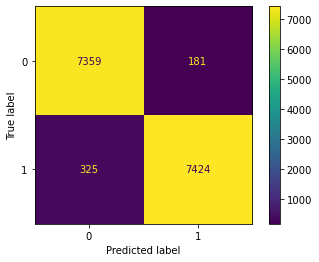

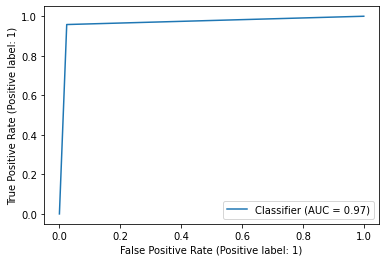

In [43]:
ConfusionMatrixDisplay.from_predictions(y_test, xgb_pred)
RocCurveDisplay.from_predictions(y_test, xgb_pred)

### Light Gradient Boosted Machine

In [44]:
#Create the model
lgb = LGBMClassifier(colsample_bytree = 0.85, max_depth = 15, min_split_gain = 0.1, 
                     n_estimators = 200, num_leaves = 50, reg_alpha = 1.2, 
                     reg_lambda = 1.2, subsample = 0.95, subsample_freq = 20)
#Train the model
lgb.fit(X_train, y_train)
#Make prediction
lgb_pred = lgb.predict(X_test)

In [45]:
print("Accuracy Score:",accuracy_score(y_test, lgb_pred))
print("AUC Score",roc_auc_score(y_test, lgb_pred))
print("classification Report:\n",classification_report(y_test, lgb_pred))
print("confusion Matrix:\n",confusion_matrix(y_test, lgb_pred))

Accuracy Score: 0.9701092288573484
AUC Score 0.9703316813703692
classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      7540
           1       0.99      0.95      0.97      7749

    accuracy                           0.97     15289
   macro avg       0.97      0.97      0.97     15289
weighted avg       0.97      0.97      0.97     15289

confusion Matrix:
 [[7439  101]
 [ 356 7393]]


In [46]:
#Satisfied
print("Precision Score",precision_score(y_test, lgb_pred))
print("Recall Score",recall_score(y_test, lgb_pred))

Precision Score 0.9865225513744329
Recall Score 0.9540585882049296


In [47]:
#Neutral or dissatisfied
print("Precision Score",precision_score(y_test, lgb_pred, pos_label=0))
print("Recall Score",recall_score(y_test, lgb_pred, pos_label=0))

Precision Score 0.9543296985246953
Recall Score 0.986604774535809


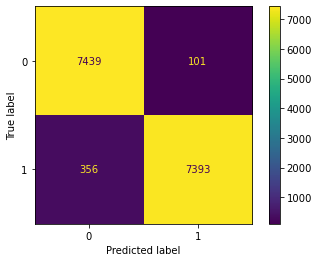

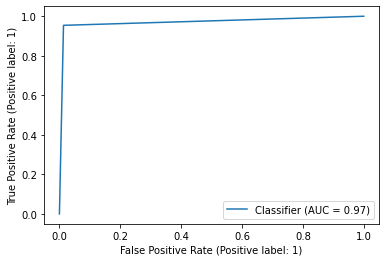

In [48]:
ConfusionMatrixDisplay.from_predictions(y_test, lgb_pred)
RocCurveDisplay.from_predictions(y_test, lgb_pred)

### Adaptive Gradient Boosting

In [49]:
#Create the model
ada = AdaBoostClassifier(learning_rate = 1.0, n_estimators = 100)
#Train the model
ada.fit(X_train, y_train)
#Make prediction
ada_pred = ada.predict(X_test)

In [50]:
print("Accuracy Score:",accuracy_score(y_test, ada_pred))
print("AUC Score",roc_auc_score(y_test, ada_pred))
print("classification Report:\n",classification_report(y_test, ada_pred))
print("confusion Matrix:\n",confusion_matrix(y_test, ada_pred))

Accuracy Score: 0.9364902871345412
AUC Score 0.9364882539819461
classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94      7540
           1       0.94      0.94      0.94      7749

    accuracy                           0.94     15289
   macro avg       0.94      0.94      0.94     15289
weighted avg       0.94      0.94      0.94     15289

confusion Matrix:
 [[7060  480]
 [ 491 7258]]


In [51]:
#Satisfied
print("Precision Score",precision_score(y_test, ada_pred))
print("Recall Score",recall_score(y_test, ada_pred))

Precision Score 0.937968467304213
Recall Score 0.9366369854174732


In [52]:
#Neutral or dissatisfied
print("Precision Score",precision_score(y_test, ada_pred, pos_label=0))
print("Recall Score",recall_score(y_test, ada_pred, pos_label=0))

Precision Score 0.9349754999337836
Recall Score 0.9363395225464191


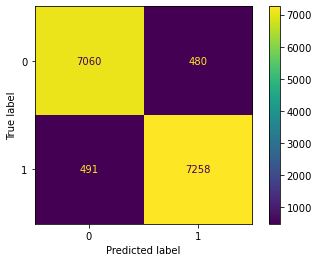

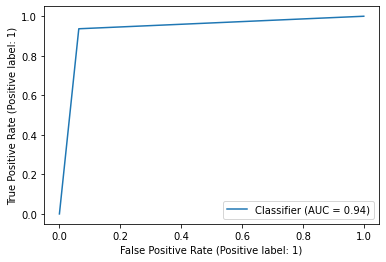

In [53]:
ConfusionMatrixDisplay.from_predictions(y_test, ada_pred)
RocCurveDisplay.from_predictions(y_test, ada_pred)

### Category Boosting

In [54]:
#Create the model
cb = CatBoostClassifier(learning_rate = 0.01)
#Train the model
cb.fit(X_train, y_train)
#Make prediction
cb_pred = cb.predict(X_test)

0:	learn: 0.6674431	total: 81.7ms	remaining: 1m 21s
1:	learn: 0.6429799	total: 94.5ms	remaining: 47.1s
2:	learn: 0.6275680	total: 105ms	remaining: 35s
3:	learn: 0.6122031	total: 116ms	remaining: 29s
4:	learn: 0.5922027	total: 127ms	remaining: 25.4s
5:	learn: 0.5731570	total: 139ms	remaining: 22.9s
6:	learn: 0.5596450	total: 150ms	remaining: 21.3s
7:	learn: 0.5412754	total: 161ms	remaining: 20s
8:	learn: 0.5293310	total: 172ms	remaining: 18.9s
9:	learn: 0.5118095	total: 183ms	remaining: 18.1s
10:	learn: 0.4994574	total: 194ms	remaining: 17.4s
11:	learn: 0.4827004	total: 205ms	remaining: 16.8s
12:	learn: 0.4668356	total: 215ms	remaining: 16.3s
13:	learn: 0.4571411	total: 226ms	remaining: 15.9s
14:	learn: 0.4478313	total: 237ms	remaining: 15.5s
15:	learn: 0.4340580	total: 247ms	remaining: 15.2s
16:	learn: 0.4254160	total: 258ms	remaining: 14.9s
17:	learn: 0.4181989	total: 270ms	remaining: 14.7s
18:	learn: 0.4119306	total: 280ms	remaining: 14.5s
19:	learn: 0.3999286	total: 291ms	remaining:

171:	learn: 0.1225322	total: 2.05s	remaining: 9.88s
172:	learn: 0.1222311	total: 2.06s	remaining: 9.87s
173:	learn: 0.1219613	total: 2.07s	remaining: 9.85s
174:	learn: 0.1214782	total: 2.08s	remaining: 9.83s
175:	learn: 0.1212022	total: 2.1s	remaining: 9.81s
176:	learn: 0.1210027	total: 2.11s	remaining: 9.79s
177:	learn: 0.1208090	total: 2.12s	remaining: 9.78s
178:	learn: 0.1205118	total: 2.13s	remaining: 9.76s
179:	learn: 0.1202594	total: 2.14s	remaining: 9.74s
180:	learn: 0.1199637	total: 2.15s	remaining: 9.72s
181:	learn: 0.1195300	total: 2.16s	remaining: 9.71s
182:	learn: 0.1193531	total: 2.17s	remaining: 9.69s
183:	learn: 0.1191648	total: 2.18s	remaining: 9.67s
184:	learn: 0.1190017	total: 2.19s	remaining: 9.65s
185:	learn: 0.1187191	total: 2.2s	remaining: 9.64s
186:	learn: 0.1184508	total: 2.21s	remaining: 9.62s
187:	learn: 0.1182487	total: 2.22s	remaining: 9.6s
188:	learn: 0.1180132	total: 2.23s	remaining: 9.58s
189:	learn: 0.1177671	total: 2.24s	remaining: 9.57s
190:	learn: 0.1

332:	learn: 0.0973264	total: 3.78s	remaining: 7.58s
333:	learn: 0.0972575	total: 3.79s	remaining: 7.57s
334:	learn: 0.0972071	total: 3.81s	remaining: 7.55s
335:	learn: 0.0971160	total: 3.82s	remaining: 7.54s
336:	learn: 0.0970377	total: 3.83s	remaining: 7.53s
337:	learn: 0.0969556	total: 3.84s	remaining: 7.52s
338:	learn: 0.0967690	total: 3.85s	remaining: 7.5s
339:	learn: 0.0967283	total: 3.86s	remaining: 7.49s
340:	learn: 0.0965736	total: 3.87s	remaining: 7.47s
341:	learn: 0.0965307	total: 3.88s	remaining: 7.46s
342:	learn: 0.0963277	total: 3.89s	remaining: 7.45s
343:	learn: 0.0962779	total: 3.9s	remaining: 7.44s
344:	learn: 0.0962497	total: 3.91s	remaining: 7.42s
345:	learn: 0.0961481	total: 3.92s	remaining: 7.41s
346:	learn: 0.0961105	total: 3.93s	remaining: 7.4s
347:	learn: 0.0959367	total: 3.94s	remaining: 7.38s
348:	learn: 0.0958693	total: 3.95s	remaining: 7.37s
349:	learn: 0.0957956	total: 3.96s	remaining: 7.36s
350:	learn: 0.0957280	total: 3.97s	remaining: 7.35s
351:	learn: 0.0

495:	learn: 0.0871339	total: 5.56s	remaining: 5.65s
496:	learn: 0.0871138	total: 5.57s	remaining: 5.64s
497:	learn: 0.0870676	total: 5.58s	remaining: 5.63s
498:	learn: 0.0870449	total: 5.59s	remaining: 5.62s
499:	learn: 0.0870229	total: 5.6s	remaining: 5.6s
500:	learn: 0.0869161	total: 5.61s	remaining: 5.59s
501:	learn: 0.0868745	total: 5.62s	remaining: 5.58s
502:	learn: 0.0868347	total: 5.63s	remaining: 5.57s
503:	learn: 0.0866992	total: 5.64s	remaining: 5.56s
504:	learn: 0.0866689	total: 5.66s	remaining: 5.54s
505:	learn: 0.0866349	total: 5.67s	remaining: 5.53s
506:	learn: 0.0866045	total: 5.68s	remaining: 5.52s
507:	learn: 0.0865834	total: 5.69s	remaining: 5.51s
508:	learn: 0.0865629	total: 5.7s	remaining: 5.5s
509:	learn: 0.0864582	total: 5.71s	remaining: 5.49s
510:	learn: 0.0864292	total: 5.72s	remaining: 5.47s
511:	learn: 0.0864049	total: 5.73s	remaining: 5.46s
512:	learn: 0.0863463	total: 5.74s	remaining: 5.45s
513:	learn: 0.0863140	total: 5.75s	remaining: 5.44s
514:	learn: 0.08

656:	learn: 0.0808520	total: 7.54s	remaining: 3.93s
657:	learn: 0.0808343	total: 7.55s	remaining: 3.92s
658:	learn: 0.0808199	total: 7.57s	remaining: 3.91s
659:	learn: 0.0807904	total: 7.58s	remaining: 3.91s
660:	learn: 0.0807650	total: 7.6s	remaining: 3.9s
661:	learn: 0.0807464	total: 7.61s	remaining: 3.89s
662:	learn: 0.0807262	total: 7.63s	remaining: 3.88s
663:	learn: 0.0807031	total: 7.65s	remaining: 3.87s
664:	learn: 0.0806886	total: 7.66s	remaining: 3.86s
665:	learn: 0.0806542	total: 7.68s	remaining: 3.85s
666:	learn: 0.0806402	total: 7.7s	remaining: 3.84s
667:	learn: 0.0806310	total: 7.72s	remaining: 3.84s
668:	learn: 0.0806112	total: 7.74s	remaining: 3.83s
669:	learn: 0.0805688	total: 7.76s	remaining: 3.82s
670:	learn: 0.0805473	total: 7.78s	remaining: 3.81s
671:	learn: 0.0805229	total: 7.8s	remaining: 3.81s
672:	learn: 0.0805125	total: 7.82s	remaining: 3.8s
673:	learn: 0.0804882	total: 7.84s	remaining: 3.79s
674:	learn: 0.0804372	total: 7.86s	remaining: 3.78s
675:	learn: 0.080

822:	learn: 0.0770103	total: 9.91s	remaining: 2.13s
823:	learn: 0.0770010	total: 9.92s	remaining: 2.12s
824:	learn: 0.0769694	total: 9.93s	remaining: 2.11s
825:	learn: 0.0769620	total: 9.95s	remaining: 2.1s
826:	learn: 0.0769509	total: 9.96s	remaining: 2.08s
827:	learn: 0.0769372	total: 9.97s	remaining: 2.07s
828:	learn: 0.0769176	total: 9.98s	remaining: 2.06s
829:	learn: 0.0769047	total: 9.99s	remaining: 2.05s
830:	learn: 0.0768907	total: 10s	remaining: 2.04s
831:	learn: 0.0768332	total: 10s	remaining: 2.02s
832:	learn: 0.0768163	total: 10s	remaining: 2.01s
833:	learn: 0.0768024	total: 10s	remaining: 2s
834:	learn: 0.0767446	total: 10.1s	remaining: 1.99s
835:	learn: 0.0767152	total: 10.1s	remaining: 1.98s
836:	learn: 0.0766818	total: 10.1s	remaining: 1.96s
837:	learn: 0.0766609	total: 10.1s	remaining: 1.95s
838:	learn: 0.0766387	total: 10.1s	remaining: 1.94s
839:	learn: 0.0765944	total: 10.1s	remaining: 1.93s
840:	learn: 0.0765823	total: 10.1s	remaining: 1.92s
841:	learn: 0.0765544	to

994:	learn: 0.0737589	total: 12.1s	remaining: 60.6ms
995:	learn: 0.0737428	total: 12.1s	remaining: 48.5ms
996:	learn: 0.0737293	total: 12.1s	remaining: 36.3ms
997:	learn: 0.0736985	total: 12.1s	remaining: 24.2ms
998:	learn: 0.0736785	total: 12.1s	remaining: 12.1ms
999:	learn: 0.0736404	total: 12.1s	remaining: 0us


In [55]:
print("Accuracy Score:",accuracy_score(y_test, cb_pred))
print("AUC Score",roc_auc_score(y_test, cb_pred))
print("classification Report:\n",classification_report(y_test, cb_pred))
print("confusion Matrix:\n",confusion_matrix(y_test, cb_pred))

Accuracy Score: 0.9671005297926614
AUC Score 0.9673081116310721
classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97      7540
           1       0.98      0.95      0.97      7749

    accuracy                           0.97     15289
   macro avg       0.97      0.97      0.97     15289
weighted avg       0.97      0.97      0.97     15289

confusion Matrix:
 [[7408  132]
 [ 371 7378]]


In [56]:
#Satisfied
print("Precision Score",precision_score(y_test, cb_pred))
print("Recall Score",recall_score(y_test, cb_pred))

Precision Score 0.9824234354194408
Recall Score 0.952122854561879


In [57]:
#Neutral or dissatisfied
print("Precision Score",precision_score(y_test, cb_pred, pos_label=0))
print("Recall Score",recall_score(y_test, cb_pred, pos_label=0))

Precision Score 0.9523074945365728
Recall Score 0.9824933687002653


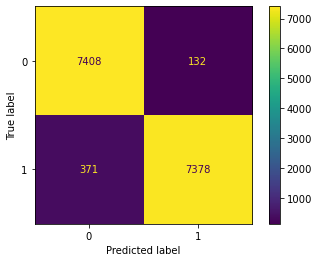

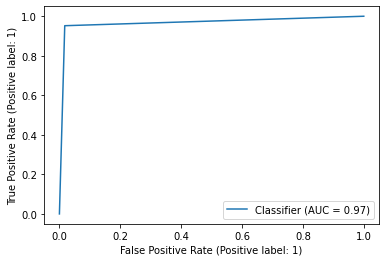

In [58]:
ConfusionMatrixDisplay.from_predictions(y_test, cb_pred)
RocCurveDisplay.from_predictions(y_test, cb_pred)